In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd
import numpy as np
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import warnings

# Data Preprocessing

In [5]:
os.chdir('C:\DS\Freecodecamp\kids vs fold')
if os.path.isdir('train/kids') is False:
    os.makedirs('train/kids')
    os.makedirs('train/fold')
    os.makedirs('valid/kids')
    os.makedirs('valid/fold')
    os.makedirs('test/kids')
    os.makedirs('test/fold')
    for c in random.sample(glob.glob('kids*'), 100):
        shutil.move(c, 'train/kids')
    for c in random.sample(glob.glob('fold*'), 100):
        shutil.move(c, 'train/fold')
    for c in random.sample(glob.glob('kids*'), 25):
        shutil.move(c, 'valid/kids')
    for c in random.sample(glob.glob('fold*'), 25):
        shutil.move(c, 'valid/fold')
    for c in random.sample(glob.glob('kids*'), 25):
        shutil.move(c, 'test/kids')
    for c in random.sample(glob.glob('fold*'), 25):
        shutil.move(c, 'test/fold')

In [6]:
if os.path.isdir('train/mountain') is False:
    os.makedirs('train/mountain')
    os.makedirs('valid/mountain')
    os.makedirs('test/mountain')
    for c in random.sample(glob.glob('mountain*'), 100):
        shutil.move(c, 'train/mountain')
    for c in random.sample(glob.glob('mountain*'), 25):
        shutil.move(c, 'valid/mountain')
    for c in random.sample(glob.glob('mountain*'), 25):
        shutil.move(c, 'test/mountain')


In [7]:
train_path = './train'
valid_path = './valid'
test_path = './test'

In [8]:
train_batches = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)\
    .flow_from_directory(directory = train_path, target_size = (224,224), classes = ['fold', 'kids', 'mountain'], batch_size = 10)
valid_batches =ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)\
    .flow_from_directory(directory = valid_path, target_size = (224,224), classes = ['fold', 'kids', 'mountain'], batch_size = 10)
test_batches =ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)\
    .flow_from_directory(directory = test_path, target_size = (224,224), classes = ['fold', 'kids', 'mountain'], batch_size = 10, shuffle = False)

Found 300 images belonging to 3 classes.
Found 75 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [9]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig,axes = plt.subplots(1,10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

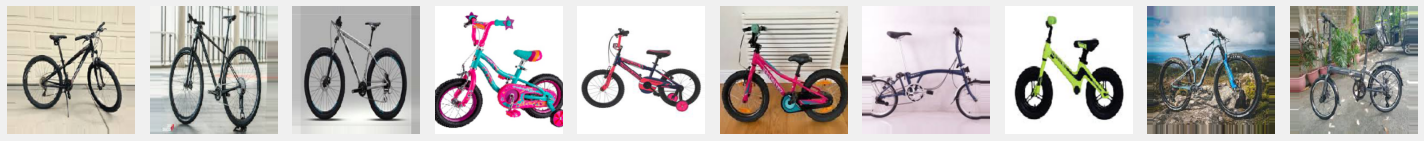

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [10]:
plotImages(imgs)
print(labels)

In [116]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(224,224,3)))

#add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2))) #to get the max element from the feature maps

#add another convolutional layer
model.add(Conv2D(32,(5,5), activation = 'relu'))

#add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#add a flattening layer
model.add(Flatten())

# add layer with 1000 neurons
model.add(Dense(1000, activation = 'relu'))

#add a drop out layer
model.add(Dropout(0.5))

# add layer with 500 neurons
model.add(Dense(500, activation = 'relu'))

#add a drop out layer
model.add(Dropout(0.5))

# add layer with 250 neurons
model.add(Dense(250, activation = 'relu'))

# add layer with 10 neurons
model.add(Dense(3, activation = 'softmax')) #3 different classification

In [117]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', 
             metrics = ['accuracy'])

In [118]:
base = model.fit(x = train_batches, validation_data = valid_batches, epochs = 10, verbose=2)

Epoch 1/10
30/30 - 28s - loss: 1.5728 - accuracy: 0.3567 - val_loss: 1.0546 - val_accuracy: 0.6267
Epoch 2/10
30/30 - 26s - loss: 1.0829 - accuracy: 0.5100 - val_loss: 1.0186 - val_accuracy: 0.5467
Epoch 3/10
30/30 - 27s - loss: 0.8758 - accuracy: 0.6167 - val_loss: 0.8045 - val_accuracy: 0.6933
Epoch 4/10
30/30 - 26s - loss: 0.7604 - accuracy: 0.6733 - val_loss: 0.6216 - val_accuracy: 0.7067
Epoch 5/10
30/30 - 26s - loss: 0.6370 - accuracy: 0.7000 - val_loss: 0.6416 - val_accuracy: 0.7333
Epoch 6/10
30/30 - 26s - loss: 0.6359 - accuracy: 0.7600 - val_loss: 0.8912 - val_accuracy: 0.6667
Epoch 7/10
30/30 - 26s - loss: 0.8666 - accuracy: 0.6400 - val_loss: 0.9625 - val_accuracy: 0.4800
Epoch 8/10
30/30 - 26s - loss: 0.6824 - accuracy: 0.6767 - val_loss: 0.9839 - val_accuracy: 0.6400
Epoch 9/10
30/30 - 26s - loss: 0.5540 - accuracy: 0.7900 - val_loss: 0.8231 - val_accuracy: 0.6533
Epoch 10/10
30/30 - 27s - loss: 0.5323 - accuracy: 0.7767 - val_loss: 0.7897 - val_accuracy: 0.6000


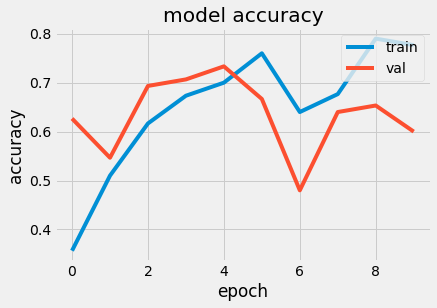

In [121]:
plt.plot(base.history['accuracy'])
plt.plot(base.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper right')
plt.show()

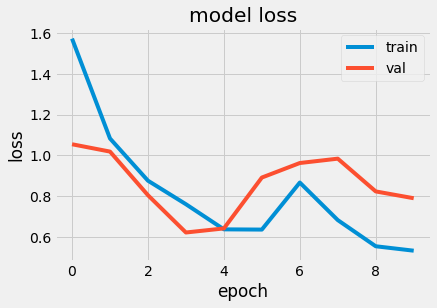

In [122]:
plt.plot(base.history['loss'])
plt.plot(base.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper right')
plt.show()

In [123]:
predictions = model.predict(x= test_batches, verbose= 0)

In [124]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis= -1))
def plot_confusion_matrix(cm,classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation = 'nearest', cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float')/ cm.sum(axis = 1)[:, np.newaxis]
        print('normalize confusion matrix')
    else:
        print('confusion matrix, without normalization')
    print(cm)
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label') 

In [125]:
test_batches.class_indices

{'fold': 0, 'kids': 1, 'mountain': 2}

confusion matrix, without normalization
[[22  1  2]
 [ 8 16  1]
 [ 5  1 19]]


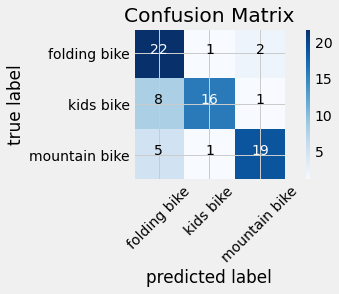

In [127]:
cm_plot_labels = ['folding bike', 'kids bike', 'mountain bike']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title = 'Confusion Matrix')

# Using vgg16 preprocessing

In [138]:
vgg16_model = tf.keras.applications.vgg16.VGG16()


In [139]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [140]:
model2 = Sequential()
for layer in vgg16_model.layers[:-1]: #we dont want 1000 predictions, we just want 2
    model2.add(layer)

In [141]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [142]:
for layer in model2.layers:
    layer.trainable = False

In [143]:
model2.add(Dense(units = 3, activation = 'softmax'))

In [144]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [145]:
model2.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', 
             metrics = ['accuracy'])

In [146]:
model_vgg = model2.fit(x = train_batches, validation_data = valid_batches, epochs= 10, verbose = 2)

Epoch 1/10
30/30 - 44s - loss: 1.2492 - accuracy: 0.4367 - val_loss: 0.8234 - val_accuracy: 0.6667
Epoch 2/10
30/30 - 49s - loss: 0.7360 - accuracy: 0.7233 - val_loss: 0.7351 - val_accuracy: 0.7867
Epoch 3/10
30/30 - 47s - loss: 0.5693 - accuracy: 0.8067 - val_loss: 0.5773 - val_accuracy: 0.7867
Epoch 4/10
30/30 - 47s - loss: 0.4956 - accuracy: 0.8200 - val_loss: 0.5139 - val_accuracy: 0.8533
Epoch 5/10
30/30 - 47s - loss: 0.4591 - accuracy: 0.8133 - val_loss: 0.6172 - val_accuracy: 0.7333
Epoch 6/10
30/30 - 47s - loss: 0.3714 - accuracy: 0.9033 - val_loss: 0.4731 - val_accuracy: 0.8133
Epoch 7/10
30/30 - 47s - loss: 0.3497 - accuracy: 0.8867 - val_loss: 0.4692 - val_accuracy: 0.8400
Epoch 8/10
30/30 - 47s - loss: 0.3079 - accuracy: 0.9167 - val_loss: 0.4111 - val_accuracy: 0.8667
Epoch 9/10
30/30 - 47s - loss: 0.2785 - accuracy: 0.9133 - val_loss: 0.4306 - val_accuracy: 0.8267
Epoch 10/10
30/30 - 47s - loss: 0.2672 - accuracy: 0.9433 - val_loss: 0.4017 - val_accuracy: 0.8400


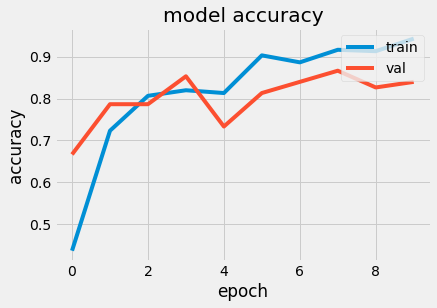

In [149]:
plt.plot(model_vgg.history['accuracy'])
plt.plot(model_vgg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper right')
plt.show()

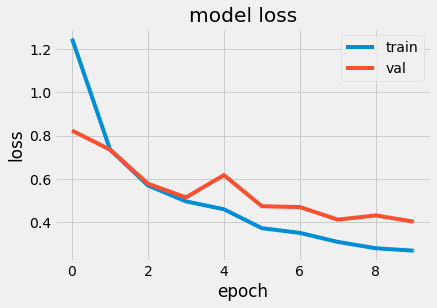

In [150]:
plt.plot(model_vgg.history['loss'])
plt.plot(model_vgg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper right')
plt.show()

In [151]:
predictions2 = model2.predict(x= test_batches, verbose= 0)

In [86]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions2, axis= -1))
def plot_confusion_matrix(cm,classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation = 'nearest', cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float')/ cm.sum(axis = 1)[:, np.newaxis]
        print('normalize confusion matrix')
    else:
        print('confusion matrix, without normalization')
    print(cm)
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label') 

In [87]:
test_batches.class_indices

{'fold': 0, 'kids': 1}

confusion matrix, without normalization
[[22  1  2]
 [ 8 16  1]
 [ 5  1 19]]


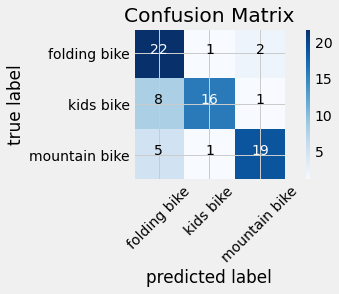

In [152]:
cm_plot_labels = ['folding bike', 'kids bike', 'mountain bike']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title = 'Confusion Matrix')

In [153]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory = train_path, target_size = (224,224), classes = ['fold', 'kids', 'mountain'], batch_size = 10)
valid_batches =ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory = valid_path, target_size = (224,224), classes = ['fold', 'kids', 'mountain'], batch_size = 10)
test_batches =ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory = test_path, target_size = (224,224), classes = ['fold', 'kids', 'mountain'], batch_size = 10, shuffle = False)


Found 300 images belonging to 3 classes.
Found 75 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [154]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig,axes = plt.subplots(1,10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

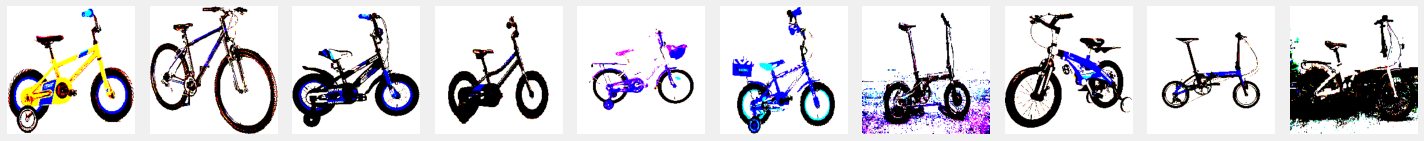

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [155]:
plotImages(imgs)
print(labels)

In [159]:
vgg16_model = tf.keras.applications.vgg16.VGG16()


In [160]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [161]:
model = Sequential()
for layer in vgg16_model.layers[:-1]: #we dont want 1000 predictions, we just want 2
    model.add(layer)

In [162]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [163]:
for layer in model.layers:
    layer.trainable = False

In [164]:
model.add(Dense(units = 3, activation = 'softmax'))

In [165]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [166]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', 
             metrics = ['accuracy'])

In [167]:
model3 = model.fit(x = train_batches, validation_data = valid_batches, epochs= 10, verbose = 2)

Epoch 1/10
30/30 - 64s - loss: 0.7274 - accuracy: 0.7333 - val_loss: 0.3148 - val_accuracy: 0.9067
Epoch 2/10
30/30 - 66s - loss: 0.1350 - accuracy: 0.9500 - val_loss: 0.2419 - val_accuracy: 0.9200
Epoch 3/10
30/30 - 64s - loss: 0.0868 - accuracy: 0.9667 - val_loss: 0.2176 - val_accuracy: 0.9333
Epoch 4/10
30/30 - 64s - loss: 0.0555 - accuracy: 0.9833 - val_loss: 0.2042 - val_accuracy: 0.9333
Epoch 5/10
30/30 - 64s - loss: 0.0444 - accuracy: 0.9933 - val_loss: 0.2426 - val_accuracy: 0.9333
Epoch 6/10
30/30 - 74s - loss: 0.0297 - accuracy: 0.9933 - val_loss: 0.2256 - val_accuracy: 0.9200
Epoch 7/10
30/30 - 69s - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.2071 - val_accuracy: 0.9200
Epoch 8/10
30/30 - 69s - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.2148 - val_accuracy: 0.9333
Epoch 9/10
30/30 - 72s - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.2006 - val_accuracy: 0.9333
Epoch 10/10
30/30 - 73s - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.2095 - val_accuracy: 0.9333


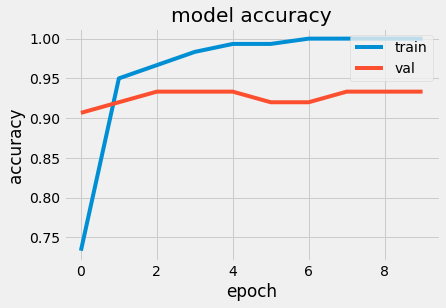

In [169]:
plt.plot(model3.history['accuracy'])
plt.plot(model3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper right')
plt.show()

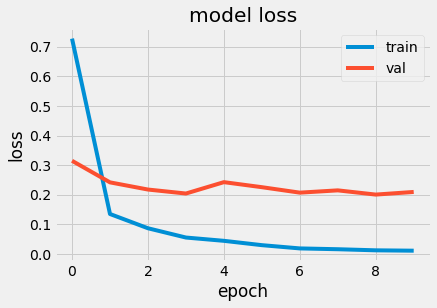

In [170]:
plt.plot(model3.history['loss'])
plt.plot(model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper right')
plt.show()

In [172]:
predictions3 = model.predict(x= test_batches, verbose= 0)

In [173]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis= -1))
def plot_confusion_matrix(cm,classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation = 'nearest', cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float')/ cm.sum(axis = 1)[:, np.newaxis]
        print('normalize confusion matrix')
    else:
        print('confusion matrix, without normalization')
    print(cm)
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label') 

In [174]:
test_batches.class_indices

{'fold': 0, 'kids': 1, 'mountain': 2}

confusion matrix, without normalization
[[22  1  2]
 [ 8 16  1]
 [ 5  1 19]]


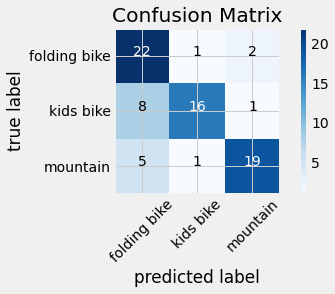

In [175]:
cm_plot_labels = ['folding bike', 'kids bike', 'mountain']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title = 'Confusion Matrix')

In [181]:
from skimage.transform import resize

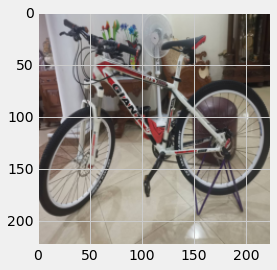

In [237]:
new_image = plt.imread('giant.jpg')
img = plt.imshow(new_image)
resized_image = resize(new_image, (224,224,3))
img = plt.imshow(resized_image)

In [238]:
#get the models predictions
new_predict = model.predict(np.array([resized_image]))
#show the predictions
new_predict

array([[0.01690894, 0.1191598 , 0.8639313 ]], dtype=float32)

In [239]:
new_predict[0]

array([0.01690894, 0.1191598 , 0.8639313 ], dtype=float32)

In [240]:
new_pred = list(new_predict[0])
test= {'folding_bikes' : new_pred[0],
      'kids_bikes' : new_pred[1], 'mountain_bikes' : new_pred[2]}

In [241]:
list_index = [0,1,2]
x = new_predict
for i in range(3):
    for j in range(3):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
#show sorted labels in order
print(list_index)

[2, 1, 0]


In [242]:
if list_index[0] == 0:
    print('folding bikes')
elif list_index[0] == 1:
    print('kids bikes')
else:
    print('mountain bikes')

mountain bikes


In [247]:
model.save('C:\DS\Freecodecamp/model_tensor.h5')